In [67]:
import librosa
from librosa.feature import melspectrogram
from librosa.display import specshow
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchnmf import NMF, NMFD

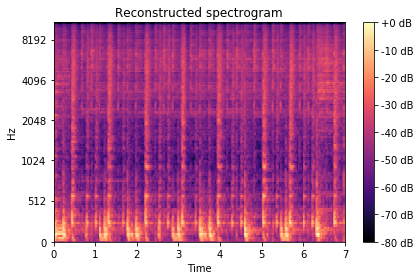

In [68]:
y, sr = librosa.load('../tests/Amen-break.wav')
windowsize = 2048
S = melspectrogram(y, sr, n_fft=windowsize, power=1)


specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()
#plt.show()


In [74]:
V = torch.Tensor(S).cuda()
net = NMFD(S.shape, 10, 3).cuda()
net.fit(V, beta=1, verbose=1, max_iter=1000)
net.sort()
net = net.cpu()


 18%|█▊        | 176/1000 [00:01<00:04, 169.52it/s, loss=0.00824]


tensor(2.5927e-26) tensor(3.6704e-17)


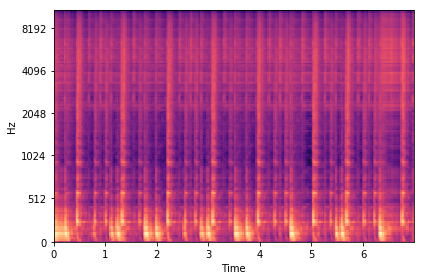

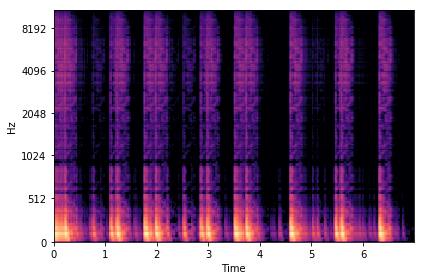

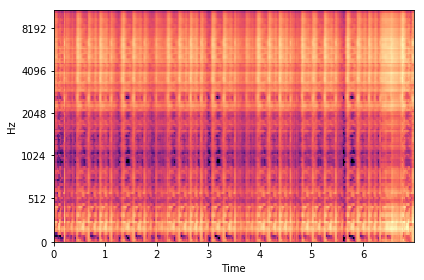

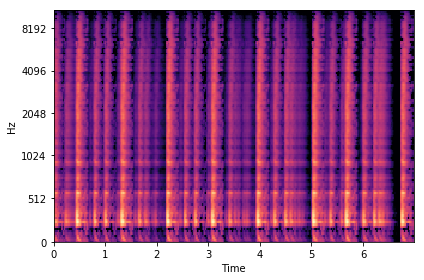

In [75]:
W, H = net.W.detach(), net.H.detach()
print(W.min(), H.min())

with torch.no_grad():
    specshow(librosa.amplitude_to_db(net.reconstruct(H, W).numpy(), ref=np.max), y_axis='mel', x_axis='time')
    plt.tight_layout()
    plt.show()
    specshow(librosa.amplitude_to_db(net.reconstruct(H[:1], W[:, :1]).numpy(), ref=np.max),  y_axis='mel',x_axis='time')
    plt.tight_layout()
    plt.show()
    specshow(librosa.amplitude_to_db(net.reconstruct(H[1:2], W[:, 1:2]).numpy(), ref=np.max),  y_axis='mel',x_axis='time')
    plt.tight_layout()
    plt.show()
    specshow(librosa.amplitude_to_db(net.reconstruct(H[2:], W[:, 2:]).numpy(), ref=np.max),  y_axis='mel',x_axis='time')
    plt.tight_layout()
    plt.show()
